In [21]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
from matplotlib.ticker import NullFormatter
import sys
import scipy
from __future__ import print_function, division

import os
import math
import time

from matplotlib import rcParams
from matplotlib.ticker import MultipleLocator, AutoLocator, AutoMinorLocator
from matplotlib import gridspec
from matplotlib import cm

In [22]:
import xpsi

In [23]:
from xpsi.global_imports import _c, _G, _dpr, gravradius, _csq, _km, _2pi

In [24]:
bounds = dict(distance = (0.1, 1.0),                     # (Earth) distance
                mass = (1.0, 3.0),                       # mass
                radius = (3.0 * gravradius(1.0), 16.0),  # equatorial radius
                cos_inclination = (0.0, 1.0))      # (Earth) inclination to rotation axis

spacetime = xpsi.Spacetime(bounds=bounds, values=dict(frequency=572.4221706696483))

Creating parameter:
    > Named "frequency" with fixed value 5.724e+02.
    > Spin frequency [Hz].
Creating parameter:
    > Named "mass" with bounds [1.000e+00, 3.000e+00].
    > Gravitational mass [solar masses].
Creating parameter:
    > Named "radius" with bounds [4.430e+00, 1.600e+01].
    > Coordinate equatorial radius [km].
Creating parameter:
    > Named "distance" with bounds [1.000e-01, 1.000e+00].
    > Earth distance [kpc].
Creating parameter:
    > Named "cos_inclination" with bounds [0.000e+00, 1.000e+00].
    > Cosine of Earth inclination to rotation axis.


In [25]:
bounds = dict(super_colatitude = (None, None),
              super_radius = (None, None),
              phase_shift = (0.0, 0.1),
              super_temperature = (None, None))

primary = xpsi.HotRegion(bounds=bounds,
	                    values={},
	                    symmetry=False,
	                    omit=False,
	                    cede=False,
	                    concentric=False,
	                    sqrt_num_cells=50,
	                    min_sqrt_num_cells=1,
	                    max_sqrt_num_cells=128,
	                    num_leaves=50,
	                    num_rays=50,
	                    prefix='p',
						mycoolgrid = False)

Creating parameter:
    > Named "super_colatitude" with bounds [0.000e+00, 3.142e+00].
    > The colatitude of the centre of the superseding region [radians].
Creating parameter:
    > Named "super_radius" with bounds [0.000e+00, 1.571e+00].
    > The angular radius of the (circular) superseding region [radians].
Creating parameter:
    > Named "phase_shift" with bounds [0.000e+00, 1.000e-01].
    > The phase of the hot region, a periodic parameter [cycles].
Creating parameter:
    > Named "super_temperature" with bounds [3.000e+00, 7.600e+00].
    > log10(superseding region effective temperature [K]).


In [26]:
secondary = xpsi.HotRegion(bounds=bounds,
                              values={}, # no fixed/derived variables
                              symmetry=False,
                              omit=False,
                              cede=False,
                              concentric=False,
                              sqrt_num_cells=50,
                              min_sqrt_num_cells=1,
                              max_sqrt_num_cells=128,
                              num_leaves=50,
                              num_rays=50,
                              do_fast=False,
                              is_secondary=False,
                              is_antiphased=True,
                              prefix='s',
                              mycoolgrid = False)

from xpsi import HotRegions

hot = HotRegions((primary, secondary))

Creating parameter:
    > Named "super_colatitude" with bounds [0.000e+00, 3.142e+00].
    > The colatitude of the centre of the superseding region [radians].
Creating parameter:
    > Named "super_radius" with bounds [0.000e+00, 1.571e+00].
    > The angular radius of the (circular) superseding region [radians].
Creating parameter:
    > Named "phase_shift" with bounds [0.000e+00, 1.000e-01].
    > The phase of the hot region, a periodic parameter [cycles].
Creating parameter:
    > Named "super_temperature" with bounds [3.000e+00, 7.600e+00].
    > log10(superseding region effective temperature [K]).


In [27]:
elsewhere = xpsi.Elsewhere(sqrt_num_cells=64,bounds=dict(elsewhere_temperature = (None,None)),
                           mycoolgrid=False)

Creating parameter:
    > Named "elsewhere_temperature" with bounds [1.000e+00, 7.600e+00].
    > log10 of the effective temperature elsewhere.


In [28]:
photosphere = xpsi.Photosphere(hot = hot, elsewhere = elsewhere,
                               values=dict(mode_frequency = spacetime['frequency']))
star = xpsi.Star(spacetime = spacetime, photospheres = photosphere)
star

Creating parameter:
    > Named "mode_frequency" with fixed value 5.724e+02.
    > Coordinate frequency of the mode of radiative asymmetry in the
photosphere that is assumed to generate the pulsed signal [Hz].


Free parameters
---------------
mass: Gravitational mass [solar masses].
radius: Coordinate equatorial radius [km].
distance: Earth distance [kpc].
cos_inclination: Cosine of Earth inclination to rotation axis.
p__phase_shift: The phase of the hot region, a periodic parameter [cycles].
p__super_colatitude: The colatitude of the centre of the superseding region [radians].
p__super_radius: The angular radius of the (circular) superseding region [radians].
p__super_temperature: log10(superseding region effective temperature [K]).
s__phase_shift: The phase of the hot region, a periodic parameter [cycles].
s__super_colatitude: The colatitude of the centre of the superseding region [radians].
s__super_radius: The angular radius of the (circular) superseding region [radians].
s__super_temperature: log10(superseding region effective temperature [K]).
elsewhere_temperature: log10 of the effective temperature elsewhere.

In [29]:
G = 6.67259e-8
c = 2.99e10
M = 1.68
sol_mass = 1.989e33
Mass = M * sol_mass
rg = G * (Mass)/(c**2)
R = 4.2 * rg /1.e5
Inclination = 50 #in degrees
i = Inclination/180. * np.pi

In [30]:
p = [M,
     R,
     2.5,
     math.cos(i),
     0.1,
     0.0,
     math.pi/2 - 0.05,
     7.0,
     0.0,
     math.pi,
     math.pi/2 - 0.05,
     7.0,
     7.0]

star(p)
star.params

[Gravitational mass [solar masses] = 1.680e+00,
 Coordinate equatorial radius [km] = 1.047e+01,
 Earth distance [kpc] = 2.500e+00,
 Cosine of Earth inclination to rotation axis = 6.428e-01,
 The phase of the hot region, a periodic parameter [cycles] = 1.000e-01,
 The colatitude of the centre of the superseding region [radians] = 0.000e+00,
 The angular radius of the (circular) superseding region [radians] = 1.521e+00,
 log10(superseding region effective temperature [K]) = 7.000e+00,
 The phase of the hot region, a periodic parameter [cycles] = 0.000e+00,
 The colatitude of the centre of the superseding region [radians] = 3.142e+00,
 The angular radius of the (circular) superseding region [radians] = 1.521e+00,
 log10(superseding region effective temperature [K]) = 7.000e+00,
 log10 of the effective temperature elsewhere = 7.000e+00]

In [31]:
#star['cos_inclination'] = math.cos(50.*np.pi/180.)
star.update(force_update=True)
#d = photosphere.embed
energies = np.logspace(-2.0, np.log10(12.0), 100, base=10.0)
photosphere.integrate(energies, threads=20) # the number of OpenMP threads to use

336620.649638


In [32]:
rcParams['text.usetex'] = False
rcParams['font.size'] = 14.0

def veneer(x, y, axes, lw=1.0, length=8, yticks=None):
    """ Make the plots a little more aesthetically pleasing. """
    if x is not None:
        if x[1] is not None:
            axes.xaxis.set_major_locator(MultipleLocator(x[1]))
        if x[0] is not None:
            axes.xaxis.set_minor_locator(MultipleLocator(x[0]))
    else:
        axes.xaxis.set_major_locator(AutoLocator())
        axes.xaxis.set_minor_locator(AutoMinorLocator())

    if y is not None:
        if y[1] is not None:
            axes.yaxis.set_major_locator(MultipleLocator(y[1]))
        if y[0] is not None:
            axes.yaxis.set_minor_locator(MultipleLocator(y[0]))
    else:
        axes.yaxis.set_major_locator(AutoLocator())
        axes.yaxis.set_minor_locator(AutoMinorLocator())

    axes.tick_params(which='major', colors='black', length=length, width=lw)
    axes.tick_params(which='minor', colors='black', length=int(length/2), width=lw)
    plt.setp(axes.spines.values(), linewidth=lw, color='black')

    if yticks:
        axes.set_yticks(yticks)

Flux is 7.889993697102751e-27 at frequency = 4.196216e+17
-0.07466030082046313


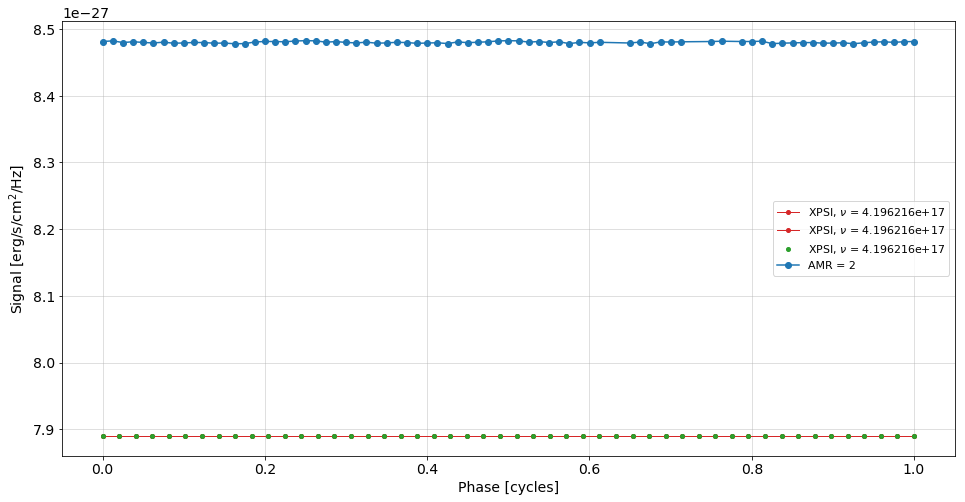

In [33]:
import pandas as pd
kpctom = 3.086e19
ind1 = 72

actual_flux1 = (photosphere.signal[1][0][ind1])/(2.5 * kpctom)**2
actual_flux2 = (photosphere.signal[0][0][ind1])/(2.5 * kpctom)**2

E_kev = energies[ind1]
h = 4.1357e-15
frequencies = energies * 1.e3 / h

kev_to_erg = 1.60218e-9
PLANCK_CONSTANT = 6.6261e-27
frequencies = energies * kev_to_erg/PLANCK_CONSTANT

freq = E_kev * kev_to_erg/PLANCK_CONSTANT

flux_ergs1 = actual_flux1 * E_kev * kev_to_erg/(kev_to_erg/PLANCK_CONSTANT)
flux_ergs2 = actual_flux2 * E_kev * kev_to_erg/(kev_to_erg/PLANCK_CONSTANT)
janskyconversion = 1.e-23

def raptor_pulse(filename):
    data = pd.read_csv(filename, delimiter=r"\s+")

    data = data.sort_values(by=['Phi'])
    phi = (data['Phi'] + np.pi)*0.1592
    flux = data['#Flux']
    return phi,flux*janskyconversion

def plot_pulse():
    """ Plot hot region signals before telescope operation. """
    data = raptor_pulse("Raptor_amr2.txt")

    fig,ax = plt.subplots(1,1,figsize=(16,8))
    fig.patch.set_facecolor('white')

    ax.set_ylabel('Signal [arbitrary normalisation]')
    ax.set_ylabel(r'Signal [erg/s/cm$^2$/Hz]')
    ax.set_xlabel('Phase [cycles]')
    ax.set_xlabel('Phase [cycles]')

    ax.plot((hot.phases_in_cycles[0]+hot.phases_in_cycles[1])/2, flux_ergs1+flux_ergs2, 'o-', color='tab:red', lw=1, markersize=4, label=r'XPSI, $\nu$ = %e'%(frequencies[ind1]))
    ax.plot((hot.phases_in_cycles[0]), flux_ergs2, 'o-', color='tab:red', lw=1, markersize=4, label=r'XPSI, $\nu$ = %e'%(frequencies[ind1]))
    ax.plot((hot.phases_in_cycles[1]), flux_ergs2, 'o', color='tab:green', lw=1, markersize=4, label=r'XPSI, $\nu$ = %e'%(frequencies[ind1]))
    ax.plot(data[0],data[1],'o-', label='AMR = 2')
    ax.grid('--',alpha=0.5)
    #ax[0].set_xlim(0,1)
    print('Flux is', (flux_ergs1+flux_ergs2)[0], 'at frequency = %e'%(frequencies[ind1]))
    print(((flux_ergs1+flux_ergs2)[0] - data[1][0])/(flux_ergs1+flux_ergs2)[0])
    ax.legend(fontsize=11)
#     ax.set_xlim(0,1)
_ = plot_pulse()

Spot 1, min Temperature 7.0 max Temperature 7.0
Spot 2, min Temperature 7.0 max Temperature 7.0


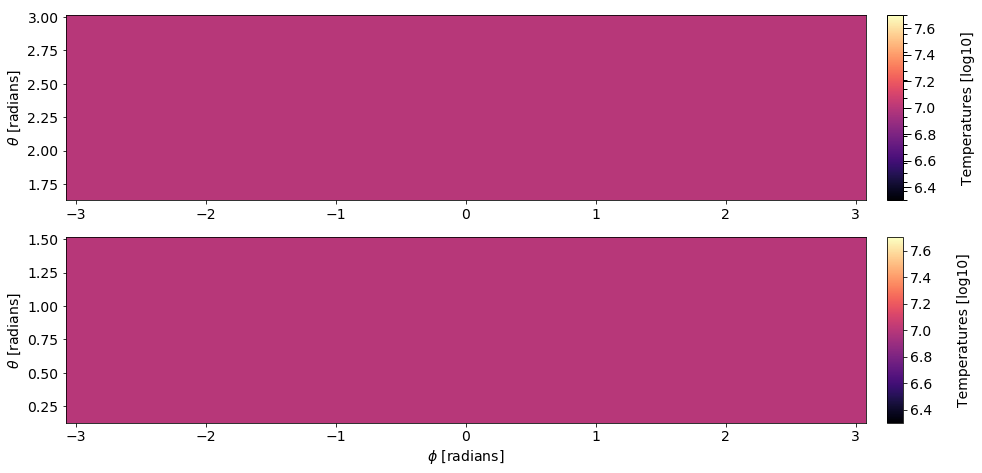

In [34]:
fig = plt.figure(figsize = (15,7.5))

gs = gridspec.GridSpec(2, 2, height_ratios=[100,100],width_ratios=[50,1], wspace=0.05)
ax = plt.subplot(gs[1,0])

# primary (lower colatitude) hot region
h0 = hot.objects[0]
z0 = h0._super_cellParamVecs[:,:,0]#/np.max(h._HotRegion__cellArea[0])
patches0 = plt.pcolormesh(h0._super_phi,
                        h0._super_theta,
                        z0,
                        vmin = np.min(z0),
                        vmax = np.max(z0),
                        cmap = cm.magma,
                        linewidth = 1.0,
                        rasterized = True)
print('Spot 1, min Temperature', np.min(z0),'max Temperature', np.max(z0))
ax.set_ylabel(r'$\theta$ [radians]')
ax.set_xlabel(r'$\phi$ [radians]')

ax_cb = plt.subplot(gs[1,1])
cb = plt.colorbar(patches0,
                  cax = ax_cb,
                  ticks = MultipleLocator(0.2))
cb.set_label(label = r'Temperatures [log10]', labelpad=25)
cb.solids.set_edgecolor('face')

ax = plt.subplot(gs[0,0])

# secondary (higher colatitude) hot region
h1 = hot.objects[1]
z1 = h1._super_cellParamVecs[:,:,0]#_HotRegion__cellArea[0]/np.max(h._HotRegion__cellArea[0])
patches1 = plt.pcolormesh(h1._super_phi,
                    h1._super_theta,
                    z1,
                    vmin = np.min(z1),
                    vmax = np.max(z1),
                    cmap = cm.magma,
                    linewidth = 1.0,
                    rasterized = True)
print('Spot 2, min Temperature', np.min(z1),'max Temperature', np.max(z1))
ax.set_ylabel(r'$\theta$ [radians]')

ax_cb = plt.subplot(gs[0,1])
cb = plt.colorbar(patches1,
                  cax = ax_cb,
                  ticks = MultipleLocator(0.2))
cb.set_label(label = r'Temperatures [log10]', labelpad=25)
cb.solids.set_edgecolor('face')

veneer((None, None), (0.05, None), ax_cb)
cb.outline.set_linewidth(1.0)

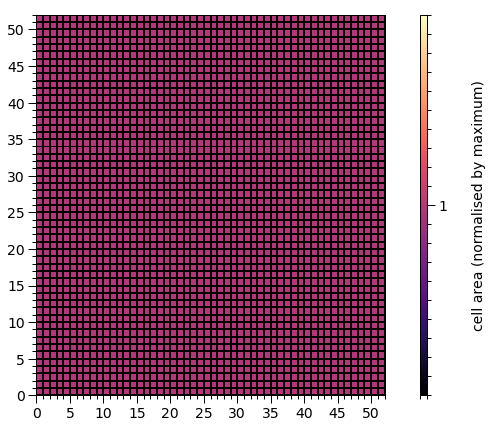

In [35]:
fig = plt.figure(figsize = (7,7))

gs = gridspec.GridSpec(1, 2, width_ratios=[50,1], wspace=0.2)
ax = plt.subplot(gs[0])
veneer((1,5), (1, 5), ax)

# primary (lower colatitude) hot region
h = hot.objects[0]
z = h._HotRegion__cellArea[0]/np.max(h._HotRegion__cellArea[0])
patches = plt.pcolormesh(z,
                         vmin = np.min(z),
                         vmax = np.max(z),
                         cmap = cm.magma,
                         linewidth = 1.0,
                         rasterized = True,
                         edgecolor='black')

ax = plt.subplot(gs[1])
veneer((1,5), (1, 5), ax)

# # secondary (higher colatitude) hot region
# h = hot.objects[1]
# z = h._HotRegion__cellArea[0]/np.max(h._HotRegion__cellArea[0])
# _ = plt.pcolormesh(z,
#                    vmin = np.min(z),
#                    vmax = np.max(z),
#                    cmap = cm.magma,
#                    linewidth = 1.0,
#                    rasterized = True,
#                    edgecolor='black')

ax_cb = plt.subplot(gs[1])
cb = plt.colorbar(patches,
                  cax = ax_cb,
                  ticks = MultipleLocator(0.2))

cb.set_label(label = r'cell area (normalised by maximum)', labelpad=25)
cb.solids.set_edgecolor('face')

veneer((None, None), (0.05, None), ax_cb)
cb.outline.set_linewidth(1.0)

In [36]:
from xpsi.tools import phase_interpolator

def plot_2D_pulse(z, x, shift, y, ylabel,
                  num_rotations=5.0, res=5000, cm=cm.viridis,
                  yticks=None):
    """ Helper function to plot a phase-energy pulse.

    :param array-like z:
        A pair of *ndarray[m,n]* objects representing the signal at
        *n* phases and *m* values of an energy variable.

    :param ndarray[n] x: Phases the signal is resolved at.

    :param tuple shift: Hot region phase parameters.

    :param ndarray[m] x: Energy values the signal is resolved at.

    """

    fig = plt.figure(figsize = (12,6))

    gs = gridspec.GridSpec(1, 2, width_ratios=[50,1], wspace=0.025)
    ax = plt.subplot(gs[0])
    ax_cb = plt.subplot(gs[1])

    new_phases = np.linspace(0.0, num_rotations, res)

    interpolated = phase_interpolator(new_phases,
                                      x,
                                      z[0], shift[0])
    interpolated += phase_interpolator(new_phases,
                                       x,
                                       z[1], shift[1])

    profile = ax.pcolormesh(new_phases,
                             y,
                             interpolated/np.max(interpolated),
                             cmap = cm,
                             linewidth = 0,
                             rasterized = True)

    profile.set_edgecolor('face')

    ax.set_xlim([0.0, num_rotations])
    ax.set_yscale('log')
    ax.set_ylabel(ylabel)
    ax.set_xlabel(r'Phase')
    veneer((0.1, 0.5), (None,None), ax, yticks=yticks)
    if yticks is not None:
        ax.set_yticklabels(yticks)

    cb = plt.colorbar(profile,
                      cax = ax_cb,
                      ticks = MultipleLocator(0.2))

    cb.set_label(label=r'Signal (normalised by maximum)', labelpad=25)
    cb.solids.set_edgecolor('face')

    veneer((None, None), (0.05, None), ax_cb)
    cb.outline.set_linewidth(1.0)

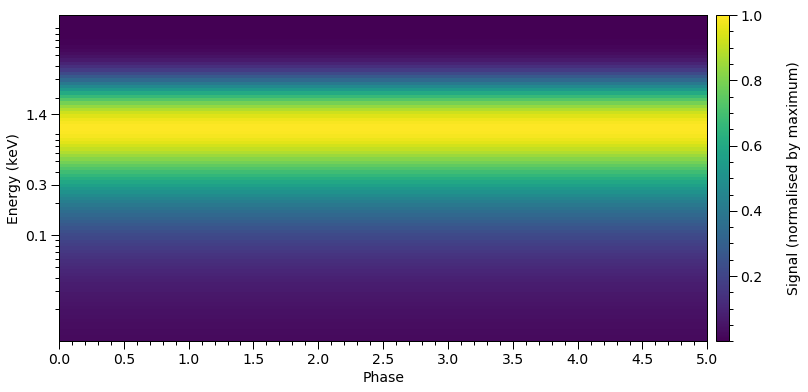

In [37]:
plot_2D_pulse((photosphere.signal[0][0], photosphere.signal[1][0]),
              x=hot.phases_in_cycles[0],
              shift=[ hot['p__phase_shift'], hot['s__phase_shift'] ],
              y=energies,
              ylabel=r'Energy (keV)',
              yticks=[0.1,0.3,1.4])

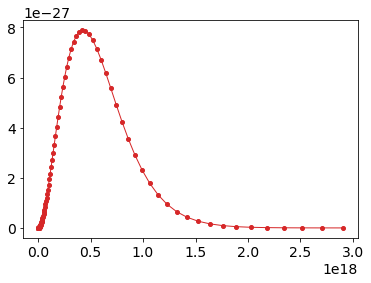

In [38]:
kpctom = 3.086e19

temp = np.transpose(photosphere.signal[0][0])[0] #np.sum(photosphere.signal[0][0], axis=1)
temp1 = np.transpose(photosphere.signal[1][0])[0]#np.sum(photosphere.signal[1][0], axis=1)
total_signal = temp + temp1
actual_flux = total_signal/(2.5 * kpctom)**2

E_kev = energies
photonstoergs = 6.63e-27
kev_to_erg = 1.60218e-9
PLANCK_CONSTANT = 6.6261e-27
freq = E_kev * kev_to_erg/PLANCK_CONSTANT
flux_ergs = actual_flux * E_kev * kev_to_erg/(kev_to_erg/PLANCK_CONSTANT)

plt.plot(freq, flux_ergs, 'o-', color='tab:red', lw=1, markersize=4,label='Phase 0')

In [39]:
path = "/home/pushpita/Documents/Ray_tracing/XPSI_updated/xpsi/Working_Notebooks/Uniform_BBstar/"
filename = path+"Rotating.txt"
sourceFile = open(filename, "w")
print( "#freq","Signal(ergs/s/cm2/Hz)", file = sourceFile)
sourceFile.close()

temp = np.transpose(photosphere.signal[0][0])[0] #np.sum(photosphere.signal[0][0], axis=1)
temp1 = np.transpose(photosphere.signal[1][0])[0]#np.sum(photosphere.signal[1][0], axis=1)
total_signal = temp + temp1
actual_flux = total_signal/(2.5 * kpctom)**2

E_kev = energies
photonstoergs = 6.63e-27
kev_to_erg = 1.60218e-9
PLANCK_CONSTANT = 6.6261e-27
freq = E_kev * kev_to_erg/PLANCK_CONSTANT
flux_ergs = actual_flux * E_kev * kev_to_erg/(kev_to_erg/PLANCK_CONSTANT)
###########################################################################

sourceFile = open(filename, "a")
for i in range(len(freq)):
    
    print(freq[i], flux_ergs[i], file = sourceFile)
sourceFile.close()

In [ ]:
photosphere.photon_specific_intensity

In [90]:
import os
import numpy as np
import math

from matplotlib import pyplot as plt
import xpsi
from xpsi.utilities.ProjectionTool import plot_projection_general

In [91]:
# EXAMPLE: ST+PDT (primary composed of a single temperature component and
#          secondary of a double temperature hot spot with protruding superseding component)
# setting the dictionary including the necessary parameters
# EXAMPLE: ST-U, setting parameter values
labels = ['mass',
          'radius',
          'cos_inclination',
          's__phase_shift',
          's__super_colatitude',
          's__super_radius',
          's__super_temperature',
          'p__phase_shift',
          'p__super_colatitude',
          'p__super_radius',
          'p__super_temperature',
          'beta',
          'column_density']

values_2hsSTU = [ 1.4, 15,  0.1,  0,  2.0944,
        0.174533,  6.15,  0,  0, math.pi/2 - 0.01,
        6.1, 9.3, 0.8]

P_dictionary_2hsSTU =  dict(zip(labels, values_2hsSTU))

P_dictionary_2hsSTU

{'beta': 9.3,
 'column_density': 0.8,
 'cos_inclination': 0.1,
 'mass': 1.4,
 'p__phase_shift': 0,
 'p__super_colatitude': 0,
 'p__super_radius': 1.5607963267948965,
 'p__super_temperature': 6.1,
 'radius': 15,
 's__phase_shift': 0,
 's__super_colatitude': 2.0944,
 's__super_radius': 0.174533,
 's__super_temperature': 6.15}

('Phase', 0)
('Phase', 0, True, 'p')
('Phase', 0)
('Phase', 0.5, True, 's')
('phiA_s', [0.5])
('colatitude: ', 0, ', phase: ', 0, ' of ', 'Primary log(T/K) = 6.10')
('colatitude: ', 2.0944, ', phase: ', 0.5, ' of ', 'Secondary log(T/K) = 6.15')


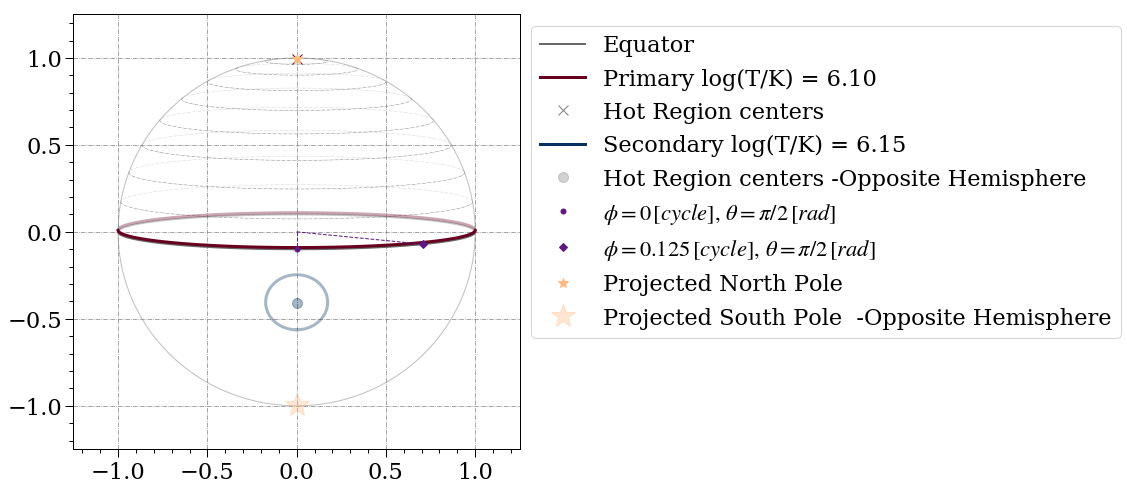

In [92]:
# from Earth and phase 0.
plot_projection_general((P_dictionary_2hsSTU),"ST+ST","I","NP")